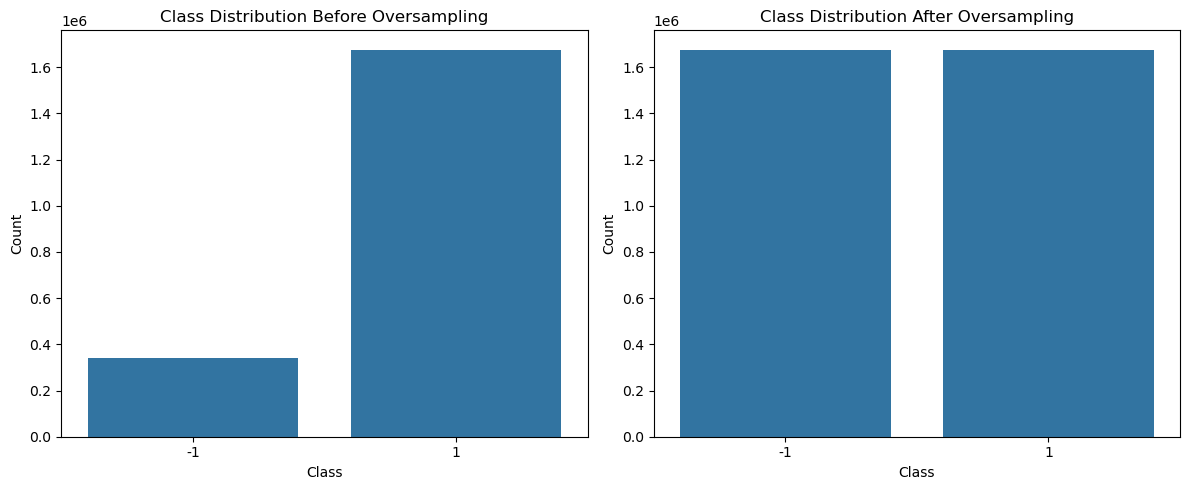


Class Distribution Before Oversampling:
Label
 1    1676159
-1     340479
Name: count, dtype: int64

Class Distribution After Oversampling:
Label
-1    1676159
 1    1676159
Name: count, dtype: int64

Metrics Without Oversampling:
Training Accuracy: 0.9991654426823258
Test Accuracy: 0.9989070929863535

Test Classification Report Without Oversampling:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     85262
           1       1.00      1.00      1.00    418898

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160


Metrics With Oversampling:
Training Accuracy: 0.9994654445073529
Test Accuracy: 0.9989011424944462

Test Classification Report With Oversampling:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     85262
           1       1.00      1.00      1.00    418898

    accu

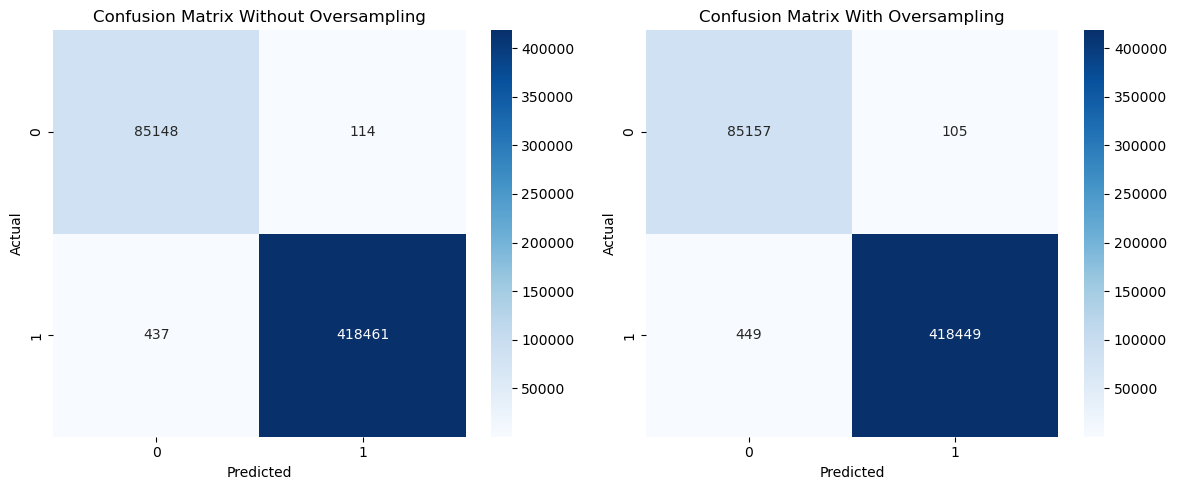

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and prepare data
df = pd.read_csv(r"D:\dataset\new_data.csv")
df = df.drop(columns=['outlier'])
X = df.drop(columns=["Label"])
y = df["Label"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot class distribution before oversampling
plt.figure(figsize=(12, 5))

# Before oversampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Perform oversampling
def oversample(X, y):
    # Get the class with the most samples
    max_class = y.value_counts().idxmax()
    max_count = y.value_counts().max()
    
    # Create oversampled data
    X_oversampled = X.copy()
    y_oversampled = y.copy()
    
    # For each class that has fewer samples than the majority class
    for class_label in y.unique():
        if class_label != max_class:
            # Get indices of current class
            class_indices = y[y == class_label].index
            # Calculate how many samples to add
            n_samples_to_add = max_count - len(class_indices)
            # Randomly sample with replacement
            indices_to_add = np.random.choice(class_indices, size=n_samples_to_add, replace=True)
            # Add the new samples
            X_oversampled = pd.concat([X_oversampled, X.loc[indices_to_add]])
            y_oversampled = pd.concat([y_oversampled, y.loc[indices_to_add]])
    
    return X_oversampled, y_oversampled

# Apply oversampling
X_train_res, y_train_res = oversample(X_train, y_train)

# Plot class distribution after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print class distribution counts
print("\nClass Distribution Before Oversampling:")
print(y_train.value_counts())
print("\nClass Distribution After Oversampling:")
print(pd.Series(y_train_res).value_counts())

# Train Random Forest with optimized parameters
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)

# Train and evaluate without oversampling
rf.fit(X_train, y_train)
y_train_pred_no_oversample = rf.predict(X_train)
y_test_pred_no_oversample = rf.predict(X_test)

print("\nMetrics Without Oversampling:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_no_oversample))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_no_oversample))
print("\nTest Classification Report Without Oversampling:")
print(classification_report(y_test, y_test_pred_no_oversample))

# Train and evaluate with oversampling
rf.fit(X_train_res, y_train_res)
y_train_pred_oversample = rf.predict(X_train_res)
y_test_pred_oversample = rf.predict(X_test)

print("\nMetrics With Oversampling:")
print("Training Accuracy:", accuracy_score(y_train_res, y_train_pred_oversample))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_oversample))
print("\nTest Classification Report With Oversampling:")
print(classification_report(y_test, y_test_pred_oversample))

# Plot confusion matrices
plt.figure(figsize=(12, 5))

# Without oversampling
plt.subplot(1, 2, 1)
cm_no_oversample = confusion_matrix(y_test, y_test_pred_no_oversample)
sns.heatmap(cm_no_oversample, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Without Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# With oversampling
plt.subplot(1, 2, 2)
cm_oversample = confusion_matrix(y_test, y_test_pred_oversample)
sns.heatmap(cm_oversample, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix With Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()